# Практическая работа №2

##### Выполнила Ткачёва Полина 
##### ММР-213

#### Описание работы

#####  Цель: Выявить основные категории расходов домохозяйств

#### Характеристика данных

##### Источник: 

In [ ]:
#Российский мониторинг экономического положения и здоровья населения НИУ-ВШЭ (RLMS-HSE)», проводимый Национальным исследовательским университетом  "Высшая школа экономики" и ООО «Демоскоп» при участии Центра народонаселения Университета Северной Каролины в Чапел Хилле и Института социологии Федерального научно-исследовательского социологического центра РАН. (Сайты обследования RLMS-HSE: https://rlms-hse.cpc.unc.edu и http://www.hse.ru/rlms)

##### Краткое описание

In [ ]:
#Был использован файл сводных данных, характеризующий доходы и расходы домохозяйств, в периоде с 1994-2021 гг. 

## Очистка датасета

In [8]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import scipy.stats as stats
import matplotlib
pd.set_option('display.max_columns', None)
pd.options.display.float_format ='{:,.3f}'.format

In [164]:
df= pd.read_excel('C:/Users/79129/Desktop/Jupiter/проверочная/HH_1994_2021_constr_rus.xlsx')

In [165]:
df

,id_w,redid_h,id_h,aid_h,bid_h,cid_h,did_h,eid_h,fid_h,gid_h,hid_h,iid_h,jid_h,kid_h,lid_h,mid_h,nid_h,oid_h,pid_h,qid_h,rid_h,sid_h,tid_h,uid_h,vid_h,wid_h,xid_h,yid_h,zid_h,origsam,hhwgt,psu,status,popul,region,site,ncat1,ncat2,ncat3,ncat4,ncat5,ncat6,mh,fh,rmh,rfh,yh,hhtype,totexpn,totexpr,dairyn,dairyr,meatn,meatr,fishn,fishr,potaton,potator,eatoutn,eatoutr,hprgncn,hprgncr,breadn,breadr,eggsn,eggsr,fatn,fatr,fruitsn,fruitsr,sugarn,sugarr,vegetn,vegetr,ofoodn,ofoodr,tobacn,tobacr,clothn,clothr,fuelaun,fuelaur,fuelwdn,fuelwdr,fuelgsn,fuelgsr,durabn,durabr,luxurn,luxurr,healthn,healthr,oservcn,oservcr,servicn,servicr,paymntn,paymntr,rentun,rentur,bondsn,bondsr,savingn,savingr,lendn,lendr,tincm.n,tincm.r,tgovcan,tgovcar,tgovncn,tgovncr,tprvcan,tprvcar,tprvncn,tprvncr,tpensnn,tpensnr,tunempn,tunempr,chdbenn,chdbenr,fuelben,fuelber,stipndn,stipndr,tothern,totherr,livstkn,livstkr,wildfdn,wildfdr,hprocan,hprocar,hproncn,hproncr,propern,properr,rentaln,rentalr,investn,investr,insbenn,insbenr,helporn,helporr,helprln,helprlr,hprgcan,hprgcar,alcohln,alcohlr,assistn,assistr,tforcan,tforcar,tforncn,tforncr,aptbenn,aptbenr,alimonn,alimonr,selljwn,selljwr,miscnfn,miscnfr,othbenn,othbenr,tmcompn,tmcompr,a.pind,a.pgrp,a.pthrn,r.pind,r.pgrp,r.pthrn,own.bwtv,own.c.tv,own.vcr,own.auto,own.frig,own.frignf,own.wash,own.washau,owndacha,own.comp,own.dvdp,own.micr,sett.typ
0,5,1,1001,1001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.046760,6,3,10800,1,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1796523.79,27191.53,80142.86,1213.010010,94285.71,1427.069946,21428.57,324.339996,0.00,0.00,32142.86,486.500000,0.00,0.00,19285.71,291.899994,0.00,0.000000,12857.14,194.600006,64285.71,973.010010,34285.71,518.940002,12857.14,194.600006,128571.43,1946.010010,15428.57,233.520004,666666.67,10090.43,0.0,0.00,0.0,0.0,0.0,0.0,40000.00,605.43,0.0,0.0,0.0,0.00,28000.00,423.799988,28000.00,423.799988,0.0,0.00,6000.0,90.809998,0.0,0.0,500000.0,7567.82,250000.0,3783.91,2060000.00,31005.42,160000.0,2408.189941,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,15051.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,300000.00,4515.350098,0.0,0.0,40285.71,609.750000,200000.0,3027.13,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,261013.000000,0.0,5.0,187357.170080,0.0,1.0,0.0,0.0,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,2.0
1,5,2,1002,1002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.029620,6,3,10800,1,1,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1724938.19,26108.04,107142.86,1621.680054,197142.86,2983.879883,25714.29,389.200012,0.00,0.00,40714.29,616.239990,31366.74,472.11,315000.00,4767.729980,77142.86,1167.609985,105000.00,1589.239990,137142.86,2075.739990,437142.86,6616.439941,137142.86,2075.739990,46285.71,700.559998,12857.14,194.600006,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,26000.00,393.529999,26000.00,393.529999,0.0,0.00,12000.0,181.630005,0.0,0.0,0.0,0.00,25000.0,378.39,1608350.07,24207.56,0.0,0.000000,0.0,0.0,1239000.0,18648.400391,0.0,0.0,0.0,0.000000,0.0,0.0,88000.0,1324.5,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-18649.93,-280.70,0.0,0.0,0.0,0.0,300000.0,4515.350098,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,17142.86,259.470001,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,516305.000000,0.0,5.0,314068.803503,1.0,1.0,0.0,0.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0
2,5,3,1003,1003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.000000,6,3,10800,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,205892.86,3116.32,16714.29,252.979996,25714.29,389.200012,0.00,0.000000,0.00,0.00,21428.57,324.339996,6250.00,94.07,16500.00,249.740005,0.00,0.000000,18857.14,285.410004,7285.71,110.269997,17142.86,259.470001,0.00,0.000000,0.00,0.000000,0.00,0.0000

In [166]:
print(df.shape)
print(df.dtypes)

(151906, 189)
id_w          int64
redid_h       int64
id_h          int64
aid_h       float64
bid_h       float64
             ...   
owndacha    float64
own.comp    float64
own.dvdp    float64
own.micr    float64
sett.typ    float64
Length: 189, dtype: object


In [167]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151906 entries, 0 to 151905
Data columns (total 189 columns):
 #    Column      Non-Null Count   Dtype  
---   ------      --------------   -----  
 0    id_w        151906 non-null  int64  
 1    redid_h     151906 non-null  int64  
 2    id_h        151906 non-null  int64  
 3    aid_h       59168 non-null   float64
 4    bid_h       57346 non-null   float64
 5    cid_h       56866 non-null   float64
 6    did_h       58091 non-null   float64
 7    eid_h       58916 non-null   float64
 8    fid_h       61408 non-null   float64
 9    gid_h       60386 non-null   float64
 10   hid_h       58703 non-null   float64
 11   iid_h       56633 non-null   float64
 12   jid_h       52809 non-null   float64
 13   kid_h       60021 non-null   float64
 14   lid_h       56644 non-null   float64
 15   mid_h       53062 non-null   float64
 16   nid_h       49600 non-null   float64
 17   oid_h       62616 non-null   float64
 18   pid_h       61097 non-

In [168]:
df.isna().sum().sort_values(ascending = False).head(60)/ len(df)* 100

own.micr      97.175227
own.dvdp      97.175227
zid_h         95.543297
yid_h         91.397311
xid_h         87.448159
tmcompn       87.300041
tmcompr       87.300041
wid_h         83.612234
vid_h         79.721670
uid_h         76.314958
own.bwtv      73.698866
tid_h         73.272287
sid_h         70.924782
tforncn       69.462036
tforncr       69.462036
nid_h         67.348229
tprvncr       66.982213
tprvncn       66.982213
tgovncr       66.982213
tgovncn       66.982213
jid_h         65.235738
mid_h         65.069188
rid_h         65.000066
iid_h         62.718392
lid_h         62.711150
cid_h         62.565007
own.washau    62.493911
own.frignf    62.493911
bid_h         62.249022
did_h         61.758588
qid_h         61.503166
hid_h         61.355707
eid_h         61.215489
aid_h         61.049596
kid_h         60.488065
gid_h         60.247785
pid_h         59.779732
fid_h         59.575000
oid_h         58.779772
own.frig      43.886351
own.wash      43.886351
owndacha      28

In [169]:
# У данного датасета есть несколько особенностей, которые стоило учесть перед анализом:
    # 1. Изначально он был подготовлен в формате "sav" (IBM SPSS), его загрузка была произведена через экспорт в более простой формат
    # 2. Сильный разброс по периоду: данные до 2015 года не будут являться релевантными для анализа
    # 3. Цены заявлены от 2003 года
    # 4. Необходимо изменить кодировку на более понятное обозначение переменных
    # 5  Необходимо учитывать, что часть данных (изначально бинарных) изначально закодирована в числовой формат

In [170]:
# Согласно вышеуказанным причинам для понимания и дальнейшего обозначения переменных следует структурировать датасет согласно заявленной цели

In [171]:
# Для этого предстоить сделать несколько шагов перед анализом:

####  1. Преобразовать сводные столбцы для удобства чтения данных

In [172]:
# Каждая волна относится к определенному году. Для лучшего понимания данных, каждому номеру волны присвоен год согласно данным RLMS

In [173]:
def get_year(year):
    if year == 5:
        return '1994'
    elif year == 6:
        return '1995'
    elif year == 7:
        return '1996'
    elif year == 8:
        return '1998'
    elif year == 9:
        return '2000'
    elif year == 10:
        return '2001'
    elif year == 11:
        return '2002'
    elif year == 12:
        return '2003'
    elif year == 13:
        return '2004'
    elif year == 14:
        return '2005'
    elif year == 15:
        return '2006'
    elif year == 16:
        return '2007'
    elif year == 17:
        return '2008'
    elif year == 18:
        return '2009'
    elif year == 19:
        return '2010'
    elif year == 20:
        return '2011'
    elif year == 21:
        return '2012'
    elif year == 22:
        return '2013'
    elif year == 23:
        return '2014'
    elif year == 24:
        return '2015'
    elif year == 25:
        return '2016'
    elif year == 26:
        return '2017'
    elif year == 27:
        return '2018'
    elif year == 28:
        return '2019'
    elif year == 29:
        return '2020'
    elif year == 30:
        return '2021'
    else:
        return year 

In [174]:
#Добавляем новый столбец
df['Year']=df['id_w'].apply(get_year)

In [175]:
# Часть из исходных данных детализирует расходы на конкретные продукты
# для того, чтобы анализировать категории, следует свести их в общую через суммирование затрат
df['dairyr']+df['meatr']+df['fishr']+df['potator']+df['breadr']+df['eggsr']+df['fatr']+df['fruitsr']+df['sugarr']+df['vegetr']+df['ofoodr']+df['totexpr']

0         34275.009980
1         50095.859824
2          4663.390015
3          2867.130003
4         24957.119921
              ...     
151901    34025.720000
151902    10243.750000
151903    13790.180000
151904    10415.830000
151905     6155.040000
Length: 151906, dtype: float64

In [176]:
# Выведем их в новый столбец
df['food']=df['dairyr']+df['meatr']+df['fishr']+df['potator']+df['breadr']+df['eggsr']+df['fatr']+df['fruitsr']+df['sugarr']+df['vegetr']+df['ofoodr']+df['totexpr']

In [177]:
# Кроме того, стоит учесть, что все переменные в изначальном датасете были закодированы
# Но для дальнейшей работы с визуализации их стоит вывести в новые столбцы без кодировки

In [178]:
# К этим данным относится характеристика регионов: тип региона, обозначение региона и глава домохозяйства

In [179]:
def get_status(status):
    if status == 1:
        return 'Областной центр'
    elif  status == 2:
        return 'Город'
    elif  status == 3:
        return 'ПГТ'
    elif  status == 4:
        return 'Село'
    else:
        return status

In [180]:
def get_region(region):
    if region == 1:
        return 'Ленинградская область, Волосовский район'
    elif  region == 9:
        return 'Краснодар'
    elif  region == 10:
        return 'Удмуртская Республика, Глазов и Глазовский район'  
    elif  region == 12:
        return 'Пермский край, Соликамск и Соликамский район' 
    elif  region == 14:
        return 'Калужская область, Куйбышевский район' 
    elif  region == 33:
        return 'Тамбовская область, Уварово и Уваровский район' 
    elif  region == 39:
        return 'Волгоградская область, Руднянский район' 
    elif  region == 45:
        return 'Казань' 
    elif  region == 46:
        return 'Курган' 
    elif  region == 47:
        return 'Оренбургская область, Орск' 
    elif  region == 48:
        return 'Республика Чувашия, Шумерля и Шумерлинский район' 
    elif  region == 52:
        return 'Ставропольский край, Георгиевск и Георгиевский район'
    elif  region == 58:
        return 'Алтайский край, Курьинский район'
    elif  region == 66:
        return 'Красноярск'
    elif  region == 67:
        return 'Тверская область, Ржев и Ржевский район'
    elif  region == 70:
        return 'Саратов'
    elif  region == 71:
        return 'Томск'
    elif  region == 72:
        return 'Липецк'
    elif  region == 73:
        return 'Красноярский край, Назарово и Назаровский район'
    elif  region == 77:
        return 'Республика Кабардино-Балкария, Залукокоаже и Зольский район'
    elif  region == 84:
        return 'Алтайский край, Бийск и Бийский район'
    elif  region == 86:
        return 'Ханты-Мансийский АО, Сургут и Сургутский район'
    elif  region == 89:
        return 'Коми Республика, Усинск и Усинский район'
    elif  region == 92:
        return 'Владивосток'
    elif  region == 93:
        return 'Амурская область, Тамбовский район'
    elif  region == 100:
        return 'Саратовская область, Вольск и Вольский район'
    elif  region == 105:
        return 'Коми Республика, Сыктывкар'
    elif  region == 106:
        return 'Челябинск'
    elif  region == 107:
        return 'Челябинская область, Красноармейский район'
    elif  region == 116:
        return 'Нижний Новгород'
    elif  region == 117:
        return 'Пензенская область, Земетчинский район'
    elif  region == 129:
        return 'Краснодарский край, Кущевский район'
    elif  region == 135:
        return 'Смоленск'
    elif  region == 136:
        return 'Тула'
    elif  region == 137:
        return 'Ростовская область, Батайск'
    elif  region == 138:
        return 'Москва'
    elif  region == 140:
        return 'Новая Москва'
    elif  region == 141:
        return 'Санкт-Петербург'
    elif  region == 142:
        return 'Московская область'
    elif  region == 161:
        return 'Новосибирская область, Бердск и Бердский район'
    elif  region == 200:
        return 'Коми Республика, Печора и Печорский район'
    else:
        return region

In [181]:
def get_family(family):
    if family == 1:
        return 'М,Трудоспособный'
    elif  family == 2:
        return 'Ж,Трудоспособный'
    elif  family == 3:
        return 'М,Пенсионный'
    elif  family == 4:
        return 'Ж,Пенсионный'
    elif  family == 5:
        return 'Все,Молодежь'
    else:
        return family

In [182]:
# Таким образом они будут выведены в отдельные столбцы
df['type_r']= df['status'].apply(get_status)
df['reg_nom']= df['region'].apply(get_region)


In [183]:
# В данном столбце есть особенность, что переменная содержит два значения - пол и характеристику трудоспособности
df['family_h']= df['hhtype'].apply(get_family)

In [184]:
# По этой причине следует разбить столбец на два
df['family_h'].str.split(',',expand=True)

,0,1
0,М,Трудоспособный
1,М,Трудоспособный
2,Ж,Трудоспособный
3,Ж,Трудоспособный
4,М,Трудоспособный
...,...,...
151901,М,Трудоспособный
151902,М,Трудоспособный
151903,М,Пенсионный
151904,Ж,Пенсионный


In [185]:
# Переименовываем строки согласно индексам
df['family_h_sex'] = df['family_h'].str.split(',').str.get(0)
df['family_h_ec'] = df['family_h'].str.split(',').str.get(1)

In [186]:
df

,id_w,redid_h,id_h,aid_h,bid_h,cid_h,did_h,eid_h,fid_h,gid_h,hid_h,iid_h,jid_h,kid_h,lid_h,mid_h,nid_h,oid_h,pid_h,qid_h,rid_h,sid_h,tid_h,uid_h,vid_h,wid_h,xid_h,yid_h,zid_h,origsam,hhwgt,psu,status,popul,region,site,ncat1,ncat2,ncat3,ncat4,ncat5,ncat6,mh,fh,rmh,rfh,yh,hhtype,totexpn,totexpr,dairyn,dairyr,meatn,meatr,fishn,fishr,potaton,potator,eatoutn,eatoutr,hprgncn,hprgncr,breadn,breadr,eggsn,eggsr,fatn,fatr,fruitsn,fruitsr,sugarn,sugarr,vegetn,vegetr,ofoodn,ofoodr,tobacn,tobacr,clothn,clothr,fuelaun,fuelaur,fuelwdn,fuelwdr,fuelgsn,fuelgsr,durabn,durabr,luxurn,luxurr,healthn,healthr,oservcn,oservcr,servicn,servicr,paymntn,paymntr,rentun,rentur,bondsn,bondsr,savingn,savingr,lendn,lendr,tincm.n,tincm.r,tgovcan,tgovcar,tgovncn,tgovncr,tprvcan,tprvcar,tprvncn,tprvncr,tpensnn,tpensnr,tunempn,tunempr,chdbenn,chdbenr,fuelben,fuelber,stipndn,stipndr,tothern,totherr,livstkn,livstkr,wildfdn,wildfdr,hprocan,hprocar,hproncn,hproncr,propern,properr,rentaln,rentalr,investn,investr,insbenn,insbenr,helporn,helporr,helprln,helprlr,hprgcan,hprgcar,alcohln,alcohlr,assistn,assistr,tforcan,tforcar,tforncn,tforncr,aptbenn,aptbenr,alimonn,alimonr,selljwn,selljwr,miscnfn,miscnfr,othbenn,othbenr,tmcompn,tmcompr,a.pind,a.pgrp,a.pthrn,r.pind,r.pgrp,r.pthrn,own.bwtv,own.c.tv,own.vcr,own.auto,own.frig,own.frignf,own.wash,own.washau,owndacha,own.comp,own.dvdp,own.micr,sett.typ,Year,food,type_r,reg_nom,family_h,family_h_sex,family_h_ec
0,5,1,1001,1001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.046760,6,3,10800,1,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1796523.79,27191.53,80142.86,1213.010010,94285.71,1427.069946,21428.57,324.339996,0.00,0.00,32142.86,486.500000,0.00,0.00,19285.71,291.899994,0.00,0.000000,12857.14,194.600006,64285.71,973.010010,34285.71,518.940002,12857.14,194.600006,128571.43,1946.010010,15428.57,233.520004,666666.67,10090.43,0.0,0.00,0.0,0.0,0.0,0.0,40000.00,605.43,0.0,0.0,0.0,0.00,28000.00,423.799988,28000.00,423.799988,0.0,0.00,6000.0,90.809998,0.0,0.0,500000.0,7567.82,250000.0,3783.91,2060000.00,31005.42,160000.0,2408.189941,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,15051.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,300000.00,4515.350098,0.0,0.0,40285.71,609.750000,200000.0,3027.13,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,261013.000000,0.0,5.0,187357.170080,0.0,1.0,0.0,0.0,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,2.0,1994,34275.009980,ПГТ,"Ленинградская область, Волосовский район","М,Трудоспособный",М,Трудоспособный
1,5,2,1002,1002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.029620,6,3,10800,1,1,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1724938.19,26108.04,107142.86,1621.680054,197142.86,2983.879883,25714.29,389.200012,0.00,0.00,40714.29,616.239990,31366.74,472.11,315000.00,4767.729980,77142.86,1167.609985,105000.00,1589.239990,137142.86,2075.739990,437142.86,6616.439941,137142.86,2075.739990,46285.71,700.559998,12857.14,194.600006,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,26000.00,393.529999,26000.00,393.529999,0.0,0.00,12000.0,181.630005,0.0,0.0,0.0,0.00,25000.0,378.39,1608350.07,24207.56,0.0,0.000000,0.0,0.0,1239000.0,18648.400391,0.0,0.0,0.0,0.000000,0.0,0.0,88000.0,1324.5,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-18649.93,-280.70,0.0,0.0,0.0,0.0,300000.0,4515.350098,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,17142.86,259.470001,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,516305.000000,0.0,5.0,314068.803503,1.0,1.0,0.0,0.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0,1994,50095.859824,ПГТ,"Ленинградская область, Волосовский район","М,Трудоспособный",М,Трудоспособный
2,5,3,1003,1003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.000000,6,3,10800,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0

####  2. Удалить лишние или нерелевантные для анализа переменные

In [187]:
df.columns

Index(['id_w', 'redid_h', 'id_h', 'aid_h', 'bid_h', 'cid_h', 'did_h', 'eid_h',
       'fid_h', 'gid_h',
       ...
       'own.dvdp', 'own.micr', 'sett.typ', 'Year', 'food', 'type_r', 'reg_nom',
       'family_h', 'family_h_sex', 'family_h_ec'],
      dtype='object', length=196)

In [188]:
# В категорию данных, не нужных для анализа можно вывести несколько типов: 
# 1. Идентификационные номера каждой волны и детализация категорий
# 2. Данные о доходах хозяйств
# 3. Информация с детализацией о тратах на еду
# 4. Номинальные расходы семей (без учета инфляции)
# 5. Детализация глав семьи 

In [189]:
# 1. Идентификационные номера каждой волны
df.drop(['id_h','aid_h','bid_h','cid_h','did_h','eid_h','fid_h','gid_h','hid_h','iid_h','jid_h','kid_h','lid_h','mid_h','nid_h','oid_h','pid_h','qid_h','rid_h','sid_h','tid_h','uid_h','vid_h','wid_h','xid_h','yid_h','zid_h','origsam'],axis=1, inplace=True)
df.drop(['ncat1','ncat2', 'ncat3', 'ncat4', 'ncat5', 'ncat6'],axis=1, inplace=True)

In [190]:
# 2. Данные о доходах хозяйств
# Удаление будет производиться через номер строки, указанный в индексе
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151906 entries, 0 to 151905
Data columns (total 162 columns):
 #    Column        Non-Null Count   Dtype  
---   ------        --------------   -----  
 0    id_w          151906 non-null  int64  
 1    redid_h       151906 non-null  int64  
 2    hhwgt         151906 non-null  float64
 3    psu           151906 non-null  int64  
 4    status        151906 non-null  int64  
 5    popul         151906 non-null  int64  
 6    region        151906 non-null  int64  
 7    site          151906 non-null  int64  
 8    mh            142214 non-null  float64
 9    fh            142214 non-null  float64
 10   rmh           142214 non-null  float64
 11   rfh           142214 non-null  float64
 12   yh            142214 non-null  float64
 13   hhtype        142214 non-null  float64
 14   totexpn       142175 non-null  float64
 15   totexpr       142175 non-null  float64
 16   dairyn        142175 non-null  float64
 17   dairyr        142175 non-nu

In [191]:
# Пронумеруем колонки для упрощенного удаления
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(df.columns)]
col_mapping

['0:id_w',
 '1:redid_h',
 '2:hhwgt',
 '3:psu',
 '4:status',
 '5:popul',
 '6:region',
 '7:site',
 '8:mh',
 '9:fh',
 '10:rmh',
 '11:rfh',
 '12:yh',
 '13:hhtype',
 '14:totexpn',
 '15:totexpr',
 '16:dairyn',
 '17:dairyr',
 '18:meatn',
 '19:meatr',
 '20:fishn',
 '21:fishr',
 '22:potaton',
 '23:potator',
 '24:eatoutn',
 '25:eatoutr',
 '26:hprgncn',
 '27:hprgncr',
 '28:breadn',
 '29:breadr',
 '30:eggsn',
 '31:eggsr',
 '32:fatn',
 '33:fatr',
 '34:fruitsn',
 '35:fruitsr',
 '36:sugarn',
 '37:sugarr',
 '38:vegetn',
 '39:vegetr',
 '40:ofoodn',
 '41:ofoodr',
 '42:tobacn',
 '43:tobacr',
 '44:clothn',
 '45:clothr',
 '46:fuelaun',
 '47:fuelaur',
 '48:fuelwdn',
 '49:fuelwdr',
 '50:fuelgsn',
 '51:fuelgsr',
 '52:durabn',
 '53:durabr',
 '54:luxurn',
 '55:luxurr',
 '56:healthn',
 '57:healthr',
 '58:oservcn',
 '59:oservcr',
 '60:servicn',
 '61:servicr',
 '62:paymntn',
 '63:paymntr',
 '64:rentun',
 '65:rentur',
 '66:bondsn',
 '67:bondsr',
 '68:savingn',
 '69:savingr',
 '70:lendn',
 '71:lendr',
 '72:tincm.n',

In [192]:
df.drop(df.columns[[26,27, 74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,120,121,122,123,124,125,126,127,128,129,132,133,134,135]], axis=1, inplace=True)

In [193]:
# 3. Информация с детализацией о тратах на еду
# Используем третий способ удаления через нахождения индекса колонки
df.drop(df.iloc[:,16:41],axis=1,inplace=True)

In [194]:
df

,id_w,redid_h,hhwgt,psu,status,popul,region,site,mh,fh,rmh,rfh,yh,hhtype,totexpn,totexpr,tobacr,clothn,clothr,fuelaun,fuelaur,fuelwdn,fuelwdr,fuelgsn,fuelgsr,durabn,durabr,luxurn,luxurr,healthn,healthr,oservcn,oservcr,servicn,servicr,paymntn,paymntr,rentun,rentur,bondsn,bondsr,savingn,savingr,lendn,lendr,tincm.n,tincm.r,alcohln,alcohlr,assistn,assistr,miscnfn,miscnfr,a.pind,a.pgrp,a.pthrn,r.pind,r.pgrp,r.pthrn,own.bwtv,own.c.tv,own.vcr,own.auto,own.frig,own.frignf,own.wash,own.washau,owndacha,own.comp,own.dvdp,own.micr,sett.typ,Year,food,type_r,reg_nom,family_h,family_h_sex,family_h_ec
0,5,1,1.046760,6,3,10800,1,1,1.0,0.0,0.0,0.0,0.0,1.0,1796523.79,27191.53,233.520004,666666.67,10090.43,0.0,0.00,0.0,0.0,0.0,0.0,40000.00,605.43,0.0,0.0,0.0,0.00,28000.00,423.799988,28000.00,423.799988,0.0,0.00,6000.0,90.809998,0.0,0.0,500000.0,7567.82,250000.0,3783.91,2060000.00,31005.42,40285.71,609.750000,200000.0,3027.13,NaN,NaN,0.0,5.0,261013.000000,0.0,5.0,187357.170080,0.0,1.0,0.0,0.0,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,2.0,1994,34275.009980,ПГТ,"Ленинградская область, Волосовский район","М,Трудоспособный",М,Трудоспособный
1,5,2,1.029620,6,3,10800,1,1,1.0,0.0,0.0,0.0,0.0,1.0,1724938.19,26108.04,194.600006,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,26000.00,393.529999,26000.00,393.529999,0.0,0.00,12000.0,181.630005,0.0,0.0,0.0,0.00,25000.0,378.39,1608350.07,24207.56,17142.86,259.470001,0.0,0.00,NaN,NaN,0.0,5.0,516305.000000,0.0,5.0,314068.803503,1.0,1.0,0.0,0.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0,1994,50095.859824,ПГТ,"Ленинградская область, Волосовский район","М,Трудоспособный",М,Трудоспособный
2,5,3,1.000000,6,3,10800,1,1,0.0,1.0,0.0,0.0,0.0,2.0,205892.86,3116.32,0.000000,60000.00,908.14,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.000000,0.00,0.000000,0.0,0.00,16000.0,242.169998,0.0,0.0,0.0,0.00,50000.0,756.78,176250.00,2652.77,0.00,0.000000,15000.0,227.03,NaN,NaN,0.0,3.0,118436.000000,0.0,4.0,95534.038932,0.0,1.0,0.0,0.0,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,2.0,1994,4663.390015,ПГТ,"Ленинградская область, Волосовский район","Ж,Трудоспособный",Ж,Трудоспособный
3,5,4,1.000000,6,3,10800,1,1,0.0,1.0,0.0,0.0,0.0,2.0,166714.29,2523.33,0.000000,50000.00,756.78,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,14000.00,211.899994,14000.00,211.899994,50000.0,756.78,30000.0,454.070007,0.0,0.0,0.0,0.00,0.0,0.00,186000.00,2799.52,0.00,0.000000,0.0,0.00,NaN,NaN,0.0,4.0,118436.000000,0.0,4.0,95534.038932,1.0,0.0,0.0,0.0,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,2.0,1994,2867.130003,ПГТ,"Ленинградская область, Волосовский район","Ж,Трудоспособный",Ж,Трудоспособный
4,5,5,1.046760,6,3,10800,1,1,1.0,0.0,0.0,0.0,0.0,1.0,1059613.09,16037.92,181.630005,83333.33,1261.30,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,35000.00,529.750000,35000.00,529.750000,0.0,0.00,50000.0,756.780029,0.0,0.0,0.0,0.00,20000.0,302.71,665541.67,10017.18,271285.71,4106.080078,0.0,0.00,NaN,NaN,0.0,5.0,261013.000000,0.0,5.0,187357.170080,1.0,1.0,0.0,0.0,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,2.0,1994,24957.119921,ПГТ,"Ленинградская область, Волосовский район","М,Трудоспособный",М,Трудоспособный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151901,30,992,0.823681,3,3,11100,142,143,1.0,0.0,0.0,0.0,0.0,1.0,116989.91,26349.08,1930.500000,10126.07,2280.65,2000.0,450.45,0.0,0.0,0.0,0.0,18564.46,4181.18,0.0,0.0,2500.0,563.06,4332.61,975.810000,6832.61,1538.880000,26640.0,6000.00,7800.0,1756.760000,0.0,0.0,0.0,0.00,0.0,0.00,84871.05,19111.33,0.00,0.000000,0.0,0.00,2000.0,450.45,0.0,5.0,28913.726033,0.0,5.0,20866.108297,NaN,1.0,0.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,2.0,2021,34025.720000,ПГТ,Московская область,"М,Трудоспособный",М,Трудоспособный
151902,30,175,0.982293,3,3,20100,142,189,1.0,0.0,0.0,0.0,0.0,1

In [195]:
# 4. Номинальные расходы семей (без учета инфляции)
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151906 entries, 0 to 151905
Data columns (total 79 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_w          151906 non-null  int64  
 1   redid_h       151906 non-null  int64  
 2   hhwgt         151906 non-null  float64
 3   psu           151906 non-null  int64  
 4   status        151906 non-null  int64  
 5   popul         151906 non-null  int64  
 6   region        151906 non-null  int64  
 7   site          151906 non-null  int64  
 8   mh            142214 non-null  float64
 9   fh            142214 non-null  float64
 10  rmh           142214 non-null  float64
 11  rfh           142214 non-null  float64
 12  yh            142214 non-null  float64
 13  hhtype        142214 non-null  float64
 14  totexpn       142175 non-null  float64
 15  totexpr       142175 non-null  float64
 16  tobacr        142175 non-null  float64
 17  clothn        142175 non-null  float64
 18  clot

In [196]:
# Удаляем номинальные расходы семей
df.drop(df.columns[[14,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,55,58]], axis=1,inplace=True)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151906 entries, 0 to 151905
Data columns (total 58 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_w          151906 non-null  int64  
 1   redid_h       151906 non-null  int64  
 2   hhwgt         151906 non-null  float64
 3   psu           151906 non-null  int64  
 4   status        151906 non-null  int64  
 5   popul         151906 non-null  int64  
 6   region        151906 non-null  int64  
 7   site          151906 non-null  int64  
 8   mh            142214 non-null  float64
 9   fh            142214 non-null  float64
 10  rmh           142214 non-null  float64
 11  rfh           142214 non-null  float64
 12  yh            142214 non-null  float64
 13  hhtype        142214 non-null  float64
 14  totexpr       142175 non-null  float64
 15  tobacr        142175 non-null  float64
 16  clothr        142175 non-null  float64
 17  fuelaur       142175 non-null  float64
 18  fuel

In [198]:
# Удаляем детализацию по главенству домохозяйства, так как были созданы сводные столбцы
df.drop(['mh', 'fh', 'rmh', 'rfh', 'yh'], axis=1,inplace=True)

In [199]:
# Следующий этап: удаление столбцов с большим количеством пустых значений

In [200]:
# Следующим очевидным шагом является нахождение пустных значений и в случае большинства из них в одной из переменных, последующее удаление
# Интересен процент пустых значений. Если определить, что пустых значений не должно быть более 15%, то их моно удалить
df.isna().sum().sort_values(ascending = False).head(40)/ len(df)* 100

own.micr        97.175227
own.dvdp        97.175227
own.bwtv        73.698866
own.frignf      62.493911
own.washau      62.493911
own.wash        43.886351
own.frig        43.886351
owndacha        28.742775
sett.typ        17.687254
miscnfr         15.988835
own.comp        13.579450
a.pgrp           8.690243
savingr          6.405935
lendr            6.405935
tincm.r          6.405935
r.pind           6.405935
assistr          6.405935
a.pind           6.405935
rentur           6.405935
r.pgrp           6.405935
bondsr           6.405935
alcohlr          6.405935
paymntr          6.405935
servicr          6.405935
healthr          6.405935
luxurr           6.405935
durabr           6.405935
fuelgsr          6.405935
fuelwdr          6.405935
fuelaur          6.405935
clothr           6.405935
tobacr           6.405935
totexpr          6.405935
food             6.405935
oservcr          6.405935
family_h_sex     6.382236
family_h_ec      6.382236
own.auto         6.380261
own.vcr     

In [201]:
# Удаляем столбцы с наибольшим количеством пустых значений
df.drop(['own.micr','own.bwtv','own.dvdp','own.wash','own.frig','own.washau','own.frignf','owndacha','sett.typ','miscnfr'],axis=1,inplace=True)

In [202]:
#После удаления столбцов просматриваем пустые значения ии по строкам, также удаляя их
df=df.dropna()

In [203]:
df

,id_w,redid_h,hhwgt,psu,status,popul,region,site,hhtype,totexpr,tobacr,clothr,fuelaur,fuelwdr,fuelgsr,durabr,luxurr,healthr,oservcr,servicr,paymntr,rentur,bondsr,savingr,lendr,tincm.r,alcohlr,assistr,a.pind,a.pgrp,r.pind,r.pgrp,own.c.tv,own.vcr,own.auto,own.comp,Year,food,type_r,reg_nom,family_h,family_h_sex,family_h_ec
11508,8,275,0.962738,6,3,10800,1,1,1.0,8840.30,250.50,442.15,265.67,0.0,0.0,0.00,552.67,185.97,770.43,956.40,398.50,0.00,0.0,0.00,797.0,5789.25,924.52,0.00,0.0,3.0,0.0,4.0,1.0,1.0,1.0,0.0,1998,12426.27,ПГТ,"Ленинградская область, Волосовский район","М,Трудоспособный",М,Трудоспособный
11510,8,277,1.000000,6,3,10800,1,1,2.0,2202.32,0.00,39.80,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,531.33,127.89,0.0,0.00,0.0,1161.94,0.00,0.00,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,1998,3561.76,ПГТ,"Ленинградская область, Волосовский район","Ж,Трудоспособный",Ж,Трудоспособный
11511,8,278,1.000000,6,3,10800,1,1,2.0,5812.15,0.00,232.11,0.00,0.0,0.0,1768.57,0.00,106.27,416.30,522.57,0.00,531.33,0.0,0.00,1594.0,3188.00,683.14,265.67,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0,1998,7658.89,ПГТ,"Ленинградская область, Волосовский район","Ж,Трудоспособный",Ж,Трудоспособный
11512,8,279,0.961577,6,3,10800,1,1,1.0,3456.94,129.28,0.00,0.00,0.0,0.0,0.00,0.00,115.63,93.00,208.63,0.00,511.02,0.0,0.00,0.0,1578.56,96.95,502.73,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,1998,5752.55,ПГТ,"Ленинградская область, Волосовский район","М,Трудоспособный",М,Трудоспособный
11514,8,281,1.000000,6,3,10800,1,1,4.0,1535.17,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,14.08,14.08,0.00,251.36,0.0,1256.81,0.0,1966.26,0.00,0.00,0.0,4.0,0.0,5.0,1.0,0.0,0.0,0.0,1998,1548.09,ПГТ,"Ленинградская область, Волосовский район","Ж,Пенсионный",Ж,Пенсионный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151901,30,992,0.823681,3,3,11100,142,143,1.0,26349.08,1930.50,2280.65,450.45,0.0,0.0,4181.18,0.00,563.06,975.81,1538.88,6000.00,1756.76,0.0,0.00,0.0,19111.33,0.00,0.00,0.0,5.0,0.0,5.0,1.0,0.0,1.0,1.0,2021,34025.72,ПГТ,Московская область,"М,Трудоспособный",М,Трудоспособный
151902,30,175,0.982293,3,3,20100,142,189,1.0,6149.91,366.09,0.00,0.00,0.0,0.0,0.00,0.00,91.12,0.00,91.12,0.00,1548.97,0.0,0.00,0.0,5542.02,0.00,0.00,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0,2021,10243.75,ПГТ,Московская область,"М,Трудоспособный",М,Трудоспособный
151903,30,6762,0.982293,3,2,189500,142,160,3.0,10026.79,0.00,0.00,0.00,0.0,0.0,0.00,0.00,2232.14,0.00,2232.14,0.00,1741.07,0.0,2232.14,0.0,14054.15,0.00,0.00,0.0,5.0,0.0,5.0,1.0,0.0,0.0,1.0,2021,13790.18,Город,Московская область,"М,Пенсионный",М,Пенсионный
151904,30,993,0.903955,3,2,189500,142,160,4.0,5672.57,0.00,52.07,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,773.65,0.0,0.00,0.0,3311.97,0.00,0.00,0.0,5.0,0.0,5.0,1.0,0.0,0.0,1.0,2021,10415.83,Город,Московская область,"Ж,Пенсионный",Ж,Пенсионный


In [204]:
#Проверим, остались ли пустые значения в датасете
df.isna().sum()

id_w            0
redid_h         0
hhwgt           0
psu             0
status          0
popul           0
region          0
site            0
hhtype          0
totexpr         0
tobacr          0
clothr          0
fuelaur         0
fuelwdr         0
fuelgsr         0
durabr          0
luxurr          0
healthr         0
oservcr         0
servicr         0
paymntr         0
rentur          0
bondsr          0
savingr         0
lendr           0
tincm.r         0
alcohlr         0
assistr         0
a.pind          0
a.pgrp          0
r.pind          0
r.pgrp          0
own.c.tv        0
own.vcr         0
own.auto        0
own.comp        0
Year            0
food            0
type_r          0
reg_nom         0
family_h        0
family_h_sex    0
family_h_ec     0
dtype: int64

####  3. Привести в порядок переменные

In [205]:
# Вызываем список колонок для того, чтобы понять, в каком порядке лучше их ставить
df.columns

Index(['id_w', 'redid_h', 'hhwgt', 'psu', 'status', 'popul', 'region', 'site',
       'hhtype', 'totexpr', 'tobacr', 'clothr', 'fuelaur', 'fuelwdr',
       'fuelgsr', 'durabr', 'luxurr', 'healthr', 'oservcr', 'servicr',
       'paymntr', 'rentur', 'bondsr', 'savingr', 'lendr', 'tincm.r', 'alcohlr',
       'assistr', 'a.pind', 'a.pgrp', 'r.pind', 'r.pgrp', 'own.c.tv',
       'own.vcr', 'own.auto', 'own.comp', 'Year', 'food', 'type_r', 'reg_nom',
       'family_h', 'family_h_sex', 'family_h_ec'],
      dtype='object')

In [206]:
# Новые столбцы через переиндексацию переставляем вперед

In [207]:
df.reindex(columns=['Year',  'id_w', 'redid_h', 'type_r','status',
                    'reg_nom','region','site','popul', 'family_h',
                    'family_h_sex', 'family_h_ec','hhtype','hhwgt',
                    'psu','food','totexpr', 'tobacr', 'clothr', 
                    'fuelaur', 'fuelwdr', 'fuelgsr', 'durabr',
                    'luxurr', 'healthr', 'oservcr', 'servicr',
                    'paymntr', 'rentur', 'bondsr', 'savingr', 'lendr', 
                    'tincm.r', 'alcohlr', 'assistr', 'a.pind', 'a.pgrp',
                    'r.pind', 'r.pgrp', 'own.c.tv','own.vcr', 'own.auto', 'own.comp'])

,Year,id_w,redid_h,type_r,status,reg_nom,region,site,popul,family_h,family_h_sex,family_h_ec,hhtype,hhwgt,psu,food,totexpr,tobacr,clothr,fuelaur,fuelwdr,fuelgsr,durabr,luxurr,healthr,oservcr,servicr,paymntr,rentur,bondsr,savingr,lendr,tincm.r,alcohlr,assistr,a.pind,a.pgrp,r.pind,r.pgrp,own.c.tv,own.vcr,own.auto,own.comp
11508,1998,8,275,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"М,Трудоспособный",М,Трудоспособный,1.0,0.962738,6,12426.27,8840.30,250.50,442.15,265.67,0.0,0.0,0.00,552.67,185.97,770.43,956.40,398.50,0.00,0.0,0.00,797.0,5789.25,924.52,0.00,0.0,3.0,0.0,4.0,1.0,1.0,1.0,0.0
11510,1998,8,277,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Трудоспособный",Ж,Трудоспособный,2.0,1.000000,6,3561.76,2202.32,0.00,39.80,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,531.33,127.89,0.0,0.00,0.0,1161.94,0.00,0.00,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
11511,1998,8,278,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Трудоспособный",Ж,Трудоспособный,2.0,1.000000,6,7658.89,5812.15,0.00,232.11,0.00,0.0,0.0,1768.57,0.00,106.27,416.30,522.57,0.00,531.33,0.0,0.00,1594.0,3188.00,683.14,265.67,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
11512,1998,8,279,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"М,Трудоспособный",М,Трудоспособный,1.0,0.961577,6,5752.55,3456.94,129.28,0.00,0.00,0.0,0.0,0.00,0.00,115.63,93.00,208.63,0.00,511.02,0.0,0.00,0.0,1578.56,96.95,502.73,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0
11514,1998,8,281,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Пенсионный",Ж,Пенсионный,4.0,1.000000,6,1548.09,1535.17,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,14.08,14.08,0.00,251.36,0.0,1256.81,0.0,1966.26,0.00,0.00,0.0,4.0,0.0,5.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151901,2021,30,992,ПГТ,3,Московская область,142,143,11100,"М,Трудоспособный",М,Трудоспособный,1.0,0.823681,3,34025.72,26349.08,1930.50,2280.65,450.45,0.0,0.0,4181.18,0.00,563.06,975.81,1538.88,6000.00,1756.76,0.0,0.00,0.0,19111.33,0.00,0.00,0.0,5.0,0.0,5.0,1.0,0.0,1.0,1.0
151902,2021,30,175,ПГТ,3,Московская область,142,189,20100,"М,Трудоспособный",М,Трудоспособный,1.0,0.982293,3,10243.75,6149.91,366.09,0.00,0.00,0.0,0.0,0.00,0.00,91.12,0.00,91.12,0.00,1548.97,0.0,0.00,0.0,5542.02,0.00,0.00,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
151903,2021,30,6762,Город,2,Московская область,142,160,189500,"М,Пенсионный",М,Пенсионный,3.0,0.982293,3,13790.18,10026.79,0.00,0.00,0.00,0.0,0.0,0.00,0.00,2232.14,0.00,2232.14,0.00,1741.07,0.0,2232.14,0.0,14054.15,0.00,0.00,0.0,5.0,0.0,5.0,1.0,0.0,0.0,1.0
151904,2021,30,993,Город,2,Московская область,142,160,189500,"Ж,Пенсионный",Ж,Пенсионный,4.0,0.903955,3,10415.83,5672.57,0.00,52.07,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,773.65,0.0,0.00,0.0,3311.97,0.00,0.00,0.0,5.0,0.0,5.0,1.0,0.0,0.0,1.0


In [208]:
# Сохраняем измененные колонки как общий датасет
df = df.reindex(columns=['Year',  'id_w', 'redid_h', 'type_r','status',
                    'reg_nom','region','site','popul', 'family_h',
                    'family_h_sex', 'family_h_ec','hhtype','hhwgt',
                    'psu','food','totexpr', 'tobacr', 'clothr', 
                    'fuelaur', 'fuelwdr', 'fuelgsr', 'durabr',
                    'luxurr', 'healthr', 'oservcr', 'servicr',
                    'paymntr', 'rentur', 'bondsr', 'savingr', 'lendr', 
                    'tincm.r', 'alcohlr', 'assistr', 'a.pind', 'a.pgrp',
                    'r.pind', 'r.pgrp', 'own.c.tv','own.vcr', 'own.auto', 'own.comp'])

In [209]:
# Убираем волны, не интересующие в анализе 
df=df.loc[df['Year']>='2007']

In [210]:
df

,Year,id_w,redid_h,type_r,status,reg_nom,region,site,popul,family_h,family_h_sex,family_h_ec,hhtype,hhwgt,psu,food,totexpr,tobacr,clothr,fuelaur,fuelwdr,fuelgsr,durabr,luxurr,healthr,oservcr,servicr,paymntr,rentur,bondsr,savingr,lendr,tincm.r,alcohlr,assistr,a.pind,a.pgrp,r.pind,r.pgrp,own.c.tv,own.vcr,own.auto,own.comp
48086,2007,16,2020,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"М,Трудоспособный",М,Трудоспособный,1.0,1.307323,6,23756.750024,21351.10,260.869995,1196.369995,0.00,0.0,0.0,3712.860107,0.0,0.000000,2262.300049,2262.300049,7000.0,2434.790039,0.0,0.00,730.44,14182.68,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,1.0
48088,2007,16,2022,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Пенсионный",Ж,Пенсионный,4.0,1.000000,6,4430.309983,3527.70,0.000000,0.000000,0.00,0.0,0.0,1712.040039,0.0,0.000000,79.129997,79.129997,0.0,505.220001,0.0,328.70,0.00,2129.84,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
48090,2007,16,2024,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Пенсионный",Ж,Пенсионный,4.0,1.000000,6,1166.080005,928.69,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000,23.520000,23.520000,0.0,618.890015,0.0,0.00,0.00,1678.43,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
48091,2007,16,2025,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Трудоспособный",Ж,Трудоспособный,2.0,1.000000,6,9397.790018,7296.47,0.000000,2475.239990,0.00,0.0,0.0,0.000000,0.0,1217.400024,0.000000,1217.400024,0.0,1095.660034,0.0,0.00,1826.10,4783.00,0.0,2130.449951,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
48092,2007,16,2042,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Трудоспособный",Ж,Трудоспособный,2.0,0.891758,6,7190.160004,5904.55,0.000000,715.359985,0.00,0.0,0.0,0.000000,0.0,1864.790039,813.250000,2678.030029,0.0,481.239990,0.0,0.00,0.00,4812.35,0.0,0.000000,0.0,4.0,0.0,5.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151901,2021,30,992,ПГТ,3,Московская область,142,143,11100,"М,Трудоспособный",М,Трудоспособный,1.0,0.823681,3,34025.720000,26349.08,1930.500000,2280.650000,450.45,0.0,0.0,4181.180000,0.0,563.060000,975.810000,1538.880000,6000.0,1756.760000,0.0,0.00,0.00,19111.33,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,1.0,1.0
151902,2021,30,175,ПГТ,3,Московская область,142,189,20100,"М,Трудоспособный",М,Трудоспособный,1.0,0.982293,3,10243.750000,6149.91,366.090000,0.000000,0.00,0.0,0.0,0.000000,0.0,91.120000,0.000000,91.120000,0.0,1548.970000,0.0,0.00,0.00,5542.02,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
151903,2021,30,6762,Город,2,Московская область,142,160,189500,"М,Пенсионный",М,Пенсионный,3.0,0.982293,3,13790.180000,10026.79,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,2232.140000,0.000000,2232.140000,0.0,1741.070000,0.0,2232.14,0.00,14054.15,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,1.0
151904,2021,30,993,Город,2,Московская область,142,160,189500,"Ж,Пенсионный",Ж,Пенсионный,4.0,0.903955,3,10415.830000,5672.57,0.000000,52.070000,0.00,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,773.650000,0.0,0.00,0.00,3311.97,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,1.0


In [211]:
# обратимся к типу переменных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93630 entries, 48086 to 151905
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          93630 non-null  object 
 1   id_w          93630 non-null  int64  
 2   redid_h       93630 non-null  int64  
 3   type_r        93630 non-null  object 
 4   status        93630 non-null  int64  
 5   reg_nom       93630 non-null  object 
 6   region        93630 non-null  int64  
 7   site          93630 non-null  int64  
 8   popul         93630 non-null  int64  
 9   family_h      93630 non-null  object 
 10  family_h_sex  93630 non-null  object 
 11  family_h_ec   93630 non-null  object 
 12  hhtype        93630 non-null  float64
 13  hhwgt         93630 non-null  float64
 14  psu           93630 non-null  int64  
 15  food          93630 non-null  float64
 16  totexpr       93630 non-null  float64
 17  tobacr        93630 non-null  float64
 18  clothr        93630 n

In [212]:
# Обращаем к тому, что столбец года в большей степени относится именно к дате. Переводим в дату
pd.to_datetime(df['Year']).dt.year
# И сохраняем в колонку

48086     2007
48088     2007
48090     2007
48091     2007
48092     2007
          ... 
151901    2021
151902    2021
151903    2021
151904    2021
151905    2021
Name: Year, Length: 93630, dtype: int64

In [213]:
df['Year']=pd.to_datetime(df['Year']).dt.year

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93630 entries, 48086 to 151905
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          93630 non-null  int64  
 1   id_w          93630 non-null  int64  
 2   redid_h       93630 non-null  int64  
 3   type_r        93630 non-null  object 
 4   status        93630 non-null  int64  
 5   reg_nom       93630 non-null  object 
 6   region        93630 non-null  int64  
 7   site          93630 non-null  int64  
 8   popul         93630 non-null  int64  
 9   family_h      93630 non-null  object 
 10  family_h_sex  93630 non-null  object 
 11  family_h_ec   93630 non-null  object 
 12  hhtype        93630 non-null  float64
 13  hhwgt         93630 non-null  float64
 14  psu           93630 non-null  int64  
 15  food          93630 non-null  float64
 16  totexpr       93630 non-null  float64
 17  tobacr        93630 non-null  float64
 18  clothr        93630 n

In [215]:
df

,Year,id_w,redid_h,type_r,status,reg_nom,region,site,popul,family_h,family_h_sex,family_h_ec,hhtype,hhwgt,psu,food,totexpr,tobacr,clothr,fuelaur,fuelwdr,fuelgsr,durabr,luxurr,healthr,oservcr,servicr,paymntr,rentur,bondsr,savingr,lendr,tincm.r,alcohlr,assistr,a.pind,a.pgrp,r.pind,r.pgrp,own.c.tv,own.vcr,own.auto,own.comp
48086,2007,16,2020,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"М,Трудоспособный",М,Трудоспособный,1.0,1.307323,6,23756.750024,21351.10,260.869995,1196.369995,0.00,0.0,0.0,3712.860107,0.0,0.000000,2262.300049,2262.300049,7000.0,2434.790039,0.0,0.00,730.44,14182.68,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,1.0
48088,2007,16,2022,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Пенсионный",Ж,Пенсионный,4.0,1.000000,6,4430.309983,3527.70,0.000000,0.000000,0.00,0.0,0.0,1712.040039,0.0,0.000000,79.129997,79.129997,0.0,505.220001,0.0,328.70,0.00,2129.84,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
48090,2007,16,2024,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Пенсионный",Ж,Пенсионный,4.0,1.000000,6,1166.080005,928.69,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000,23.520000,23.520000,0.0,618.890015,0.0,0.00,0.00,1678.43,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
48091,2007,16,2025,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Трудоспособный",Ж,Трудоспособный,2.0,1.000000,6,9397.790018,7296.47,0.000000,2475.239990,0.00,0.0,0.0,0.000000,0.0,1217.400024,0.000000,1217.400024,0.0,1095.660034,0.0,0.00,1826.10,4783.00,0.0,2130.449951,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
48092,2007,16,2042,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Трудоспособный",Ж,Трудоспособный,2.0,0.891758,6,7190.160004,5904.55,0.000000,715.359985,0.00,0.0,0.0,0.000000,0.0,1864.790039,813.250000,2678.030029,0.0,481.239990,0.0,0.00,0.00,4812.35,0.0,0.000000,0.0,4.0,0.0,5.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151901,2021,30,992,ПГТ,3,Московская область,142,143,11100,"М,Трудоспособный",М,Трудоспособный,1.0,0.823681,3,34025.720000,26349.08,1930.500000,2280.650000,450.45,0.0,0.0,4181.180000,0.0,563.060000,975.810000,1538.880000,6000.0,1756.760000,0.0,0.00,0.00,19111.33,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,1.0,1.0
151902,2021,30,175,ПГТ,3,Московская область,142,189,20100,"М,Трудоспособный",М,Трудоспособный,1.0,0.982293,3,10243.750000,6149.91,366.090000,0.000000,0.00,0.0,0.0,0.000000,0.0,91.120000,0.000000,91.120000,0.0,1548.970000,0.0,0.00,0.00,5542.02,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
151903,2021,30,6762,Город,2,Московская область,142,160,189500,"М,Пенсионный",М,Пенсионный,3.0,0.982293,3,13790.180000,10026.79,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,2232.140000,0.000000,2232.140000,0.0,1741.070000,0.0,2232.14,0.00,14054.15,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,1.0
151904,2021,30,993,Город,2,Московская область,142,160,189500,"Ж,Пенсионный",Ж,Пенсионный,4.0,0.903955,3,10415.830000,5672.57,0.000000,52.070000,0.00,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,773.650000,0.0,0.00,0.00,3311.97,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,1.0


In [217]:
df.columns

Index(['Year', 'id_w', 'redid_h', 'type_r', 'status', 'reg_nom', 'region',
       'site', 'popul', 'family_h', 'family_h_sex', 'family_h_ec', 'hhtype',
       'hhwgt', 'psu', 'food', 'totexpr', 'tobacr', 'clothr', 'fuelaur',
       'fuelwdr', 'fuelgsr', 'durabr', 'luxurr', 'healthr', 'oservcr',
       'servicr', 'paymntr', 'rentur', 'bondsr', 'savingr', 'lendr', 'tincm.r',
       'alcohlr', 'assistr', 'a.pind', 'a.pgrp', 'r.pind', 'r.pgrp',
       'own.c.tv', 'own.vcr', 'own.auto', 'own.comp'],
      dtype='object')

In [218]:
#Переименовываем колонки для дальнейшего пользования
df.rename(columns = {'Year':'Год',
                     'id_w':'№ волны',
                     'redid_h':'№ семьи',
                     'type_r':'Тип региона',
                     'status':'Тип региона_код',
                     'reg_nom':'Регион', 
                     'region':'Регион_код',
                     'site':'Регион_номер',
                     'popul':'Численность региона',
                     'family_h':'Глава семьи', 
                     'family_h_sex':'Глава семьи_пол', 
                     'family_h_ec':'Глава семьи_трудоспособность',
                     'hhtype':'Глава семьи_код',
                     'hhwgt':'Статистический вес_семьи', 
                     'psu':'Единица отбора',
                     'food':'Расходы на питание', 
                     'totexpr':'Общий объем расходов', 
                     'tobacr':'Расходы на табак', 
                     'clothr':'Расходы на одежду',
                     'fuelaur':'Расходы на топливо',
                     'fuelwdr':'Расходы на древесину',
                     'fuelgsr':'Расходы на газ',
                     'durabr':'Расходы на товары длительного пользования',
                     'luxurr':'Расходы на товары престижного потребления', 
                     'healthr':'Расходы на медицину',
                     'oservcr':'Расходы на обучение и воспитание',
                     'servicr':'Расходы на сервис', 
                     'paymntr':'Расходы на уплату долга',
                     'rentur':'Расходы на оплату квартиры',
                     'bondsr':'Расходы на ценные бумаги', 
                     'savingr':'Накопления', 
                     'lendr':'Кредиты', 
                     'tincm.r':'Совокупный доход',
                     'alcohlr':'Расходы на алкоголь', 
                     'assistr':'Расходы на другие нужды',
                     'a.pind':'Ниже предела бедности по России',
                     'a.pgrp':'Группа бедности по России', 
                     'r.pind':'Ниже предела бедности по региону',
                     'r.pgrp':'Группа бедности по региону',
                     'own.c.tv':'Наличие цветного ТВ',
                     'own.vcr':'Наличие видеомагнитофона', 
                     'own.auto':'Наличие автомобиля', 
                     'own.comp':'Наличие компьютера'}, inplace = True)

In [219]:
df

,Год,№ волны,№ семьи,Тип региона,Тип региона_код,Регион,Регион_код,Регион_номер,Численность региона,Глава семьи,Глава семьи_пол,Глава семьи_трудоспособность,Глава семьи_код,Статистический вес_семьи,Единица отбора,Расходы на питание,Общий объем расходов,Расходы на табак,Расходы на одежду,Расходы на топливо,Расходы на древесину,Расходы на газ,Расходы на товары длительного пользования,Расходы на товары престижного потребления,Расходы на медицину,Расходы на обучение и воспитание,Расходы на сервис,Расходы на уплату долга,Расходы на оплату квартиры,Расходы на ценные бумаги,Накопления,Кредиты,Совокупный доход,Расходы на алкоголь,Расходы на другие нужды,Ниже предела бедности по России,Группа бедности по России,Ниже предела бедности по региону,Группа бедности по региону,Наличие цветного ТВ,Наличие видеомагнитофона,Наличие автомобиля,Наличие компьютера
48086,2007,16,2020,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"М,Трудоспособный",М,Трудоспособный,1.0,1.307323,6,23756.750024,21351.10,260.869995,1196.369995,0.00,0.0,0.0,3712.860107,0.0,0.000000,2262.300049,2262.300049,7000.0,2434.790039,0.0,0.00,730.44,14182.68,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,1.0
48088,2007,16,2022,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Пенсионный",Ж,Пенсионный,4.0,1.000000,6,4430.309983,3527.70,0.000000,0.000000,0.00,0.0,0.0,1712.040039,0.0,0.000000,79.129997,79.129997,0.0,505.220001,0.0,328.70,0.00,2129.84,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
48090,2007,16,2024,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Пенсионный",Ж,Пенсионный,4.0,1.000000,6,1166.080005,928.69,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000,23.520000,23.520000,0.0,618.890015,0.0,0.00,0.00,1678.43,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
48091,2007,16,2025,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Трудоспособный",Ж,Трудоспособный,2.0,1.000000,6,9397.790018,7296.47,0.000000,2475.239990,0.00,0.0,0.0,0.000000,0.0,1217.400024,0.000000,1217.400024,0.0,1095.660034,0.0,0.00,1826.10,4783.00,0.0,2130.449951,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
48092,2007,16,2042,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Трудоспособный",Ж,Трудоспособный,2.0,0.891758,6,7190.160004,5904.55,0.000000,715.359985,0.00,0.0,0.0,0.000000,0.0,1864.790039,813.250000,2678.030029,0.0,481.239990,0.0,0.00,0.00,4812.35,0.0,0.000000,0.0,4.0,0.0,5.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151901,2021,30,992,ПГТ,3,Московская область,142,143,11100,"М,Трудоспособный",М,Трудоспособный,1.0,0.823681,3,34025.720000,26349.08,1930.500000,2280.650000,450.45,0.0,0.0,4181.180000,0.0,563.060000,975.810000,1538.880000,6000.0,1756.760000,0.0,0.00,0.00,19111.33,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,1.0,1.0
151902,2021,30,175,ПГТ,3,Московская область,142,189,20100,"М,Трудоспособный",М,Трудоспособный,1.0,0.982293,3,10243.750000,6149.91,366.090000,0.000000,0.00,0.0,0.0,0.000000,0.0,91.120000,0.000000,91.120000,0.0,1548.970000,0.0,0.00,0.00,5542.02,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,0.0
151903,2021,30,6762,Город,2,Московская область,142,160,189500,"М,Пенсионный",М,Пенсионный,3.0,0.982293,3,13790.180000,10026.79,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,2232.140000,0.000000,2232.140000,0.0,1741.070000,0.0,2232.14,0.00,14054.15,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,1.0
151904,2021,30,993,Город,2,Московская область,142,160,189500,"Ж,Пенсионный",Ж,Пенсионный,4.0,0.903955,3,10415.830000,5672.57,0.000000,52.070000,0.00,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,773.650000,0.0,0.00,0.00,3311.97,0.0,0.000000,0.0,5.0,0.0,5.0,1.0,0.0,0.0,1.0


In [220]:
# Сохраняем очищенный датасет для последующей работы
df.to_pickle('C:/Users/79129/Desktop/Jupiter/проверочная/HH_1994_2021_constr_rus_new.pkl')

## Работа с данными

In [10]:
import pandas as pd
import numpy as np
import scipy.stats
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
pd.set_option('display.max_columns', None)
pd.options.display.float_format ='{:,.3f}'.format

In [11]:
df= pd.read_pickle('C:/Users/79129/Desktop/Jupiter/проверочная/HH_1994_2021_constr_rus_new.pkl')

In [12]:
df.head(20)

,Год,№ волны,№ семьи,Тип региона,Тип региона_код,Регион,Регион_код,Регион_номер,Численность региона,Глава семьи,Глава семьи_пол,Глава семьи_трудоспособность,Глава семьи_код,Статистический вес_семьи,Единица отбора,Расходы на питание,Общий объем расходов,Расходы на табак,Расходы на одежду,Расходы на топливо,Расходы на древесину,Расходы на газ,Расходы на товары длительного пользования,Расходы на товары престижного потребления,Расходы на медицину,Расходы на обучение и воспитание,Расходы на сервис,Расходы на уплату долга,Расходы на оплату квартиры,Расходы на ценные бумаги,Накопления,Кредиты,Совокупный доход,Расходы на алкоголь,Расходы на другие нужды,Ниже предела бедности по России,Группа бедности по России,Ниже предела бедности по региону,Группа бедности по региону,Наличие цветного ТВ,Наличие видеомагнитофона,Наличие автомобиля,Наличие компьютера
48086,2007,16,2020,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"М,Трудоспособный",М,Трудоспособный,1.000,1.307,6,"23,756.750","21,351.100",260.870,"1,196.370",0.000,0.000,0.000,"3,712.860",0.000,0.000,"2,262.300","2,262.300","7,000.000","2,434.790",0.000,0.000,730.440,"14,182.680",0.000,0.000,0.000,5.000,0.000,5.000,1.000,0.000,0.000,1.000
48088,2007,16,2022,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Пенсионный",Ж,Пенсионный,4.000,1.000,6,"4,430.310","3,527.700",0.000,0.000,0.000,0.000,0.000,"1,712.040",0.000,0.000,79.130,79.130,0.000,505.220,0.000,328.700,0.000,"2,129.840",0.000,0.000,0.000,5.000,0.000,5.000,1.000,0.000,0.000,0.000
48090,2007,16,2024,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Пенсионный",Ж,Пенсионный,4.000,1.000,6,"1,166.080",928.690,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,23.520,23.520,0.000,618.890,0.000,0.000,0.000,"1,678.430",0.000,0.000,0.000,5.000,0.000,5.000,1.000,0.000,0.000,0.000
48091,2007,16,2025,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Трудоспособный",Ж,Трудоспособный,2.000,1.000,6,"9,397.790","7,296.470",0.000,"2,475.240",0.000,0.000,0.000,0.000,0.000,"1,217.400",0.000,"1,217.400",0.000,"1,095.660",0.000,0.000,"1,826.100","4,783.000",0.000,"2,130.450",0.000,5.000,0.000,5.000,1.000,0.000,0.000,0.000
48092,2007,16,2042,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"Ж,Трудоспособный",Ж,Трудоспособный,2.000,0.892,6,"7,190.160","5,904.550",0.000,715.360,0.000,0.000,0.000,0.000,0.000,"1,864.790",813.250,"2,678.030",0.000,481.240,0.000,0.000,0.000,"4,812.350",0.000,0.000,0.000,4.000,0.000,5.000,1.000,1.000,1.000,0.000
48095,2007,16,2026,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"М,Трудоспособный",М,Трудоспособный,1.000,0.000,6,"5,664.910","3,571.440",273.910,247.520,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,669.570,0.000,0.000,0.000,"2,434.790",104.350,0.000,0.000,4.000,0.000,4.000,1.000,0.000,0.000,0.000
48096,2007,16,2027,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"М,Трудоспособный",М,Трудоспособный,1.000,0.892,6,"33,431.980","28,897.360",195.930,613.170,"1,203.090",0.000,0.000,"2,657.060",408.780,0.000,"1,804.630","1,804.630",0.000,"1,197.070",0.000,"15,640.140",0.000,"18,221.370",0.000,0.000,0.000,5.000,0.000,5.000,1.000,1.000,1.000,1.000
48097,2007,16,2028,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"М,Трудоспособный",М,Трудоспособный,1.000,0.000,6,"112,376.730","105,417.220",0.000,"3,094.050",608.700,0.000,0.000,"9,488.410","6,188.090",608.700,"77,132.242","77,740.938",0.000,0.000,0.000,0.000,0.000,"13,060.710",0.000,0.000,0.000,3.000,0.000,5.000,1.000,1.000,1.000,1.000
48098,2007,16,2029,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"М,Трудоспособный",М,Трудоспособный,1.000,0.892,6,"10,356.250","8,300.590",0.000,618.810,0.000,0.000,0.000,0.000,0.000,0.000,"3,043.490","3,043.490",0.000,"1,217.400",0.000,0.000,0.000,"11,540.230",782.610,"1,217.400",0.000,5.000,0.000,5.000,1.000,1.000,0.000,1.000
48099,2007,16,2030,ПГТ,3,"Ленинградская область, Волосовский район",1,1,10800,"М,Трудоспособный",М,Тр

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93630 entries, 48086 to 151905
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Год                                        93630 non-null  int64  
 1   № волны                                    93630 non-null  int64  
 2   № семьи                                    93630 non-null  int64  
 3   Тип региона                                93630 non-null  object 
 4   Тип региона_код                            93630 non-null  int64  
 5   Регион                                     93630 non-null  object 
 6   Регион_код                                 93630 non-null  int64  
 7   Регион_номер                               93630 non-null  int64  
 8   Численность региона                        93630 non-null  int64  
 9   Глава семьи                                93630 non-null  object 
 10  Глава семьи_пол  

In [14]:
# проанализируем датасет через значения распределения
df[['Расходы на питание',
       'Общий объем расходов', 'Расходы на табак', 'Расходы на одежду',
       'Расходы на топливо', 'Расходы на древесину', 'Расходы на газ',
       'Расходы на товары длительного пользования',
       'Расходы на товары престижного потребления', 'Расходы на медицину',
       'Расходы на обучение и воспитание', 'Расходы на сервис',
       'Расходы на уплату долга', 'Расходы на оплату квартиры',
       'Расходы на ценные бумаги', 'Накопления', 'Кредиты', 'Совокупный доход',
       'Расходы на алкоголь', 'Расходы на другие нужды']].describe()

,Расходы на питание,Общий объем расходов,Расходы на табак,Расходы на одежду,Расходы на топливо,Расходы на древесину,Расходы на газ,Расходы на товары длительного пользования,Расходы на товары престижного потребления,Расходы на медицину,Расходы на обучение и воспитание,Расходы на сервис,Расходы на уплату долга,Расходы на оплату квартиры,Расходы на ценные бумаги,Накопления,Кредиты,Совокупный доход,Расходы на алкоголь,Расходы на другие нужды
count,"93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000","93,630.000"
mean,"18,458.055","15,285.693",236.397,870.638,434.364,87.249,8.226,475.188,"1,649.849",712.932,"1,532.780","2,245.712","3,035.107","1,128.806",2.338,558.039,185.018,"14,206.361",137.002,605.571
std,"27,202.601","26,374.730",442.121,"1,458.715",898.947,599.626,90.843,"1,723.500","16,128.169","3,211.051","5,018.311","6,143.787","13,166.660","1,319.264",213.429,"3,780.755","2,813.657","33,322.652",475.838,"17,267.236"
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,"-8,848.820",0.000,0.000
25%,"7,329.160","5,325.852",0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.620,101.120,349.330,0.000,504.200,0.000,0.000,0.000,"6,472.600",0.000,0.000
50%,"12,686.620","9,612.090",0.000,398.810,0.000,0.000,0.000,0.000,0.000,238.100,413.790,880.005,0.000,975.610,0.000,0.000,0.000,"10,938.710",0.000,0.000
75%,"21,576.162","17,344.672",350.810,"1,172.830",675.680,0.000,0.000,0.000,0.000,669.640,"1,225.150","2,014.352","2,000.000","1,481.480",0.000,0.000,0.000,"17,397.470",100.425,228.977
max,"1,974,587.860","1,964,549.710","14,285.710","53,064.170","40,355.330","29,535.860","22,346.370","69,492.172","1,083,883.830","544,021.740","302,089.130","550,815.220","1,900,179.840","255,591.050","37,037.040","492,125.980","487,804.880","7,395,756.950","60,256.470","5,192,076.500"


In [15]:
# Отсортируем все категории расходов от большего к меньшему

In [16]:
df.groupby('Год')["Расходы на табак", 'Расходы на одежду',
       'Расходы на топливо', 'Расходы на древесину', 'Расходы на газ',
       'Расходы на товары длительного пользования',
       'Расходы на товары престижного потребления', 'Расходы на медицину',
       'Расходы на обучение и воспитание', 'Расходы на сервис',
       'Расходы на уплату долга', 'Расходы на оплату квартиры',
       'Расходы на ценные бумаги','Расходы на алкоголь'].sum()

C:\Users\79129\AppData\Local\Temp\ipykernel_3624\1907311644.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Год')["Расходы на табак", 'Расходы на одежду',


,Расходы на табак,Расходы на одежду,Расходы на топливо,Расходы на древесину,Расходы на газ,Расходы на товары длительного пользования,Расходы на товары престижного потребления,Расходы на медицину,Расходы на обучение и воспитание,Расходы на сервис,Расходы на уплату долга,Расходы на оплату квартиры,Расходы на ценные бумаги,Расходы на алкоголь
Год,,,,,,,,,,,,,,
2007,"738,852.108","5,070,949.232","1,609,745.082","453,914.019","63,679.420","3,219,829.399","8,647,432.070","2,330,198.039","6,571,599.376","8,901,797.720","7,347,502.650","4,507,996.159",0.000,"780,493.569"
2008,"751,180.450","5,175,747.970","1,861,390.670","466,678.130","44,646.280","3,443,066.100","9,263,688.910","2,655,630.170","7,677,830.380","10,333,460.390","9,141,144.530","4,817,922.400",171.120,"770,914.830"
2009,"766,699.900","4,103,651.980","1,613,699.270","460,077.860","46,109.820","2,206,701.540","6,621,090.080","2,581,461.280","6,669,109.010","9,250,574.430","8,393,125.740","5,079,103.790",0.000,"661,855.080"
2010,"1,153,188.060","6,904,113.010","2,534,407.450","838,455.050","77,675.820","3,287,546.240","10,341,104.240","3,968,519.160","8,761,485.060","12,730,003.180","12,253,948.470","7,818,407.990","18,099.540","989,325.670"
2011,"1,469,420.550","7,658,650.100","3,274,462.460","862,395.760","77,014.900","4,067,129.420","13,187,462.050","5,202,143.970","11,402,966.730","16,605,111.380","16,841,256.060","9,321,390.840","40,775.310","1,123,434.340"
2012,"1,654,112.060","8,031,942.660","3,663,454.180","682,887.320","79,247.630","4,692,534.830","19,451,135.970","6,194,727.390","14,805,407.140","21,000,130.820","23,626,063.310","9,639,397.070","4,946.250","1,427,558.480"
2013,"1,006,540.480","4,547,934.240","2,286,188.620","209,963.360","16,984.070","2,692,144.030","9,144,054.370","4,239,641.980","8,669,083.260","12,908,725.390","17,172,069.400","6,349,803.500","40,851.850","833,411.940"
2014,"1,698,675.940","6,202,986.560","3,259,430.540","600,444.530","47,639.060","3,493,478.490","13,777,351.270","5,436,058.250","10,972,840.190","16,408,897.590","25,811,295.840","8,230,945.490","5,817.230","1,157,453.700"
2015,"1,657,092.140","5,050,925.810","2,810,185.540","512,597.970","42,434.110","2,203,267.770","8,892,226.130","5,106,848.900","9,992,802.820","15,099,648.630","22,579,110.520","7,212,570.830","5,886.430","803,236.460"


<AxesSubplot:xlabel='Год'>

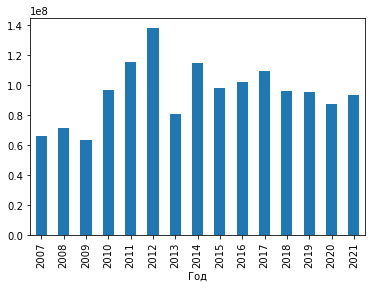

In [17]:
df.groupby('Год')['Общий объем расходов'].sum().plot(kind='bar')

In [19]:
df_21_sort = df[df['Год']==2021].groupby('Год')["Расходы на табак", 'Расходы на одежду',
       'Расходы на топливо', 'Расходы на древесину', 'Расходы на газ',
       'Расходы на товары длительного пользования',
       'Расходы на товары престижного потребления', 'Расходы на медицину',
       'Расходы на обучение и воспитание', 'Расходы на сервис',
       'Расходы на уплату долга', 'Расходы на оплату квартиры',
       'Расходы на ценные бумаги','Расходы на алкоголь'].sum()


C:\Users\79129\AppData\Local\Temp\ipykernel_3624\214601464.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_21_sort = df[df['Год']==2021].groupby('Год')["Расходы на табак", 'Расходы на одежду',


In [20]:
 df_21_sort.T.sort_values(by=2021, ascending=False)

Год,2021
Расходы на уплату долга,"22,633,902.980"
Расходы на сервис,"13,001,538.330"
Расходы на товары престижного потребления,"8,959,945.100"
Расходы на обучение и воспитание,"8,738,232.360"
Расходы на оплату квартиры,"6,656,547.450"
Расходы на одежду,"4,445,164.360"
Расходы на медицину,"4,263,308.480"
Расходы на топливо,"2,975,821.030"
Расходы на товары длительного пользования,"2,369,900.050"
Расходы на табак,"1,993,614.890"


In [22]:
df_21=df[df['Год']==2021]
df_21.describe()

,Год,№ волны,№ семьи,Тип региона_код,Регион_код,Регион_номер,Численность региона,Глава семьи_код,Статистический вес_семьи,Единица отбора,Расходы на питание,Общий объем расходов,Расходы на табак,Расходы на одежду,Расходы на топливо,Расходы на древесину,Расходы на газ,Расходы на товары длительного пользования,Расходы на товары престижного потребления,Расходы на медицину,Расходы на обучение и воспитание,Расходы на сервис,Расходы на уплату долга,Расходы на оплату квартиры,Расходы на ценные бумаги,Накопления,Кредиты,Совокупный доход,Расходы на алкоголь,Расходы на другие нужды,Ниже предела бедности по России,Группа бедности по России,Ниже предела бедности по региону,Группа бедности по региону,Наличие цветного ТВ,Наличие видеомагнитофона,Наличие автомобиля,Наличие компьютера
count,"6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000","6,417.000"
mean,"2,021.000",30.000,"3,334.387",2.096,86.910,89.834,"1,495,235.272",1.953,0.713,17.823,"17,769.291","14,616.752",310.677,692.717,463.740,75.906,5.974,369.316,"1,396.283",664.377,"1,361.732","2,026.109","3,527.178","1,037.330",5.523,489.147,73.514,"14,688.564",93.849,414.868,0.018,4.829,0.012,4.897,0.974,0.060,0.448,0.697
std,0.000,0.000,"1,938.578",1.190,47.048,48.551,"3,432,918.515",1.198,0.463,11.552,"26,864.175","26,145.139",605.821,"1,013.413",751.461,526.773,42.399,"1,450.210","17,553.429","1,745.029","5,018.639","5,442.103","11,061.311",816.628,172.282,"2,913.933","1,255.955","12,985.062",264.731,"1,806.452",0.132,0.590,0.110,0.483,0.158,0.238,0.497,0.460
min,"2,021.000",30.000,1.000,1.000,1.000,1.000,30.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-756.030,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,"2,021.000",30.000,"1,662.000",1.000,48.000,48.000,"10,100.000",1.000,0.000,7.000,"6,986.400","5,030.890",0.000,0.000,0.000,0.000,0.000,0.000,0.000,88.500,111.610,437.190,0.000,553.100,0.000,0.000,0.000,"7,318.380",0.000,0.000,0.000,5.000,0.000,5.000,1.000,0.000,0.000,0.000
50%,"2,021.000",30.000,"3,307.000",2.000,84.000,85.000,"127,900.000",1.000,0.904,17.000,"12,003.370","8,898.970",0.000,304.090,0.000,0.000,0.000,0.000,0.000,331.860,450.450,968.320,0.000,911.160,0.000,0.000,0.000,"12,047.680",0.000,0.000,0.000,5.000,0.000,5.000,1.000,0.000,0.000,1.000
75%,"2,021.000",30.000,"4,992.000",3.000,136.000,136.000,"1,022,000.000",3.000,0.982,28.000,"20,513.390","16,207.610",459.180,"1,011.240",820.740,0.000,0.000,0.000,0.000,675.680,"1,230.070","1,975.970","1,045.050","1,351.350",0.000,0.000,0.000,"18,157.100",0.000,0.000,0.000,5.000,0.000,5.000,1.000,0.000,1.000,1.000
max,"2,021.000",30.000,"6,775.000",4.000,200.000,202.000,"12,348,300.000",5.000,1.291,38.000,"1,005,798.840","1,001,313.980","6,274.130","10,262.910","13,513.510","9,009.010","1,138.950","50,335.580","955,675.040","41,822.320","302,089.130","302,772.500","400,000.000","11,261.260","9,111.620","121,126.130","88,495.580","400,902.350","3,807.360","89,285.710",1.000,5.000,1.000,5.000,1.000,1.000,1.000,1.000


In [23]:
q3 = np.percentile(df_21['Расходы на уплату долга'],75)
q1 = np.percentile(df_21['Расходы на уплату долга'],25)
q3_1 = np.percentile(df_21['Расходы на сервис'],75)
q1_1 = np.percentile(df_21['Расходы на сервис'],25)
q3_2 = np.percentile(df_21['Расходы на товары престижного потребления'],75)
q1_2 = np.percentile(df_21['Расходы на товары престижного потребления'],25)
q3_3 = np.percentile(df_21['Расходы на обучение и воспитание'],75)
q1_3 = np.percentile(df_21['Расходы на обучение и воспитание'],25)
q3_4 = np.percentile(df_21['Расходы на оплату квартиры'],75)
q1_4 = np.percentile(df_21['Расходы на оплату квартиры'],25)
q3_5 = np.percentile(df_21['Расходы на одежду'],75)
q1_5 = np.percentile(df_21['Расходы на одежду'],25)
q3_6 = np.percentile(df_21['Расходы на медицину'],75)
q1_6 = np.percentile(df_21['Расходы на медицину'],25)

In [24]:
iqr= q3-q1
iqr_1= q3_1-q1_1
iqr_2= q3_2-q1_2
iqr_3= q3_3-q1_3
iqr_4= q3_4-q1_4
iqr_5= q3_5-q1_5
iqr_6= q3_6-q1_6

In [25]:
iqr_t_bottom = q1 - 2.5*iqr
iqr_h_top = q3 + 2.5*iqr
iqr_t_bottom_1 = q1_1 - 2.5*iqr_1
iqr_h_top_1 = q3_1 + 2.5*iqr_1
iqr_t_bottom_2 = q1_2 - 2.5*iqr_2
iqr_h_top_2 = q3_2 + 2.5*iqr_2
iqr_t_bottom_3 = q1_3 - 2.5*iqr_3
iqr_h_top_3 = q3_3 + 2.5*iqr_3
iqr_t_bottom_4 = q1_4 - 2.5*iqr_4
iqr_h_top_4 = q3_4 + 2.5*iqr_4
iqr_t_bottom_5 = q1_5 - 2.5*iqr_5
iqr_h_top_5 = q3_5 + 2.5*iqr_5
iqr_t_bottom_6 = q1_6 - 2.5*iqr_6
iqr_h_top_6 = q3_6 + 2.5*iqr_6

In [66]:
df_21[(df_21['Расходы на уплату долга'] > iqr_h_top )| (df_21['Расходы на уплату долга'] < iqr_t_bottom )
    |(df_21['Расходы на сервис'] > iqr_h_top_1) | (df_21['Расходы на сервис'] < iqr_t_bottom_1)
    |(df_21['Расходы на товары престижного потребления'] > iqr_h_top_2 ) | (df_21['Расходы на товары престижного потребления'] < iqr_t_bottom_2 )
    |(df_21['Расходы на обучение и воспитание'] > iqr_h_top_3 )|(df_21['Расходы на обучение и воспитание'] < iqr_t_bottom_3 )
    |(df_21['Расходы на оплату квартиры'] > iqr_h_top_4)|(df_21['Расходы на оплату квартиры'] < iqr_t_bottom_4)
    |(df_21['Расходы на одежду'] > iqr_h_top_5)|(df_21['Расходы на одежду'] < iqr_t_bottom_5)
    |(df_21['Расходы на медицину'] > iqr_h_top_6 )| (df_21['Расходы на медицину'] <iqr_t_bottom_6 )]

,Год,№ волны,№ семьи,Тип региона,Тип региона_код,Регион,Регион_код,Регион_номер,Численность региона,Глава семьи,Глава семьи_пол,Глава семьи_трудоспособность,Глава семьи_код,Статистический вес_семьи,Единица отбора,Расходы на питание,Общий объем расходов,Расходы на табак,Расходы на одежду,Расходы на топливо,Расходы на древесину,Расходы на газ,Расходы на товары длительного пользования,Расходы на товары престижного потребления,Расходы на медицину,Расходы на обучение и воспитание,Расходы на сервис,Расходы на уплату долга,Расходы на оплату квартиры,Расходы на ценные бумаги,Накопления,Кредиты,Совокупный доход,Расходы на алкоголь,Расходы на другие нужды,Ниже предела бедности по России,Группа бедности по России,Ниже предела бедности по региону,Группа бедности по региону,Наличие цветного ТВ,Наличие видеомагнитофона,Наличие автомобиля,Наличие компьютера
145136,2021,30,555,ПГТ,3,"Ленинградская область, Волосовский район",1,1,11800,"Ж,Трудоспособный",Ж,Трудоспособный,2.000,0.000,6,"31,201.200","29,321.960",0.000,"1,520.430",900.900,0.000,0.000,"4,561.290",0.000,225.230,45.050,270.270,"18,000.000","1,171.170",0.000,0.000,0.000,"15,762.660",185.330,"6,756.760",0.000,5.000,0.000,5.000,1.000,1.000,1.000,1.000
145138,2021,30,557,ПГТ,3,"Ленинградская область, Волосовский район",1,1,11800,"Ж,Пенсионный",Ж,Пенсионный,4.000,0.904,6,"23,359.220","19,428.110",0.000,0.000,0.000,0.000,0.000,0.000,267.590,0.000,"7,129.840","7,129.840",0.000,"1,366.740",0.000,"6,264.240",0.000,"13,547.100",331.920,227.790,0.000,5.000,0.000,5.000,1.000,1.000,0.000,1.000
145141,2021,30,560,ПГТ,3,"Ленинградская область, Волосовский район",1,1,11800,"Ж,Пенсионный",Ж,Пенсионный,4.000,0.904,6,"93,948.630","89,673.640",0.000,0.000,"1,138.950","2,050.110",0.000,0.000,0.000,455.580,0.000,455.580,"81,754.000",0.000,0.000,0.000,0.000,"9,324.970",0.000,0.000,0.000,5.000,0.000,5.000,1.000,0.000,1.000,1.000
145142,2021,30,561,ПГТ,3,"Ленинградская область, Волосовский район",1,1,11800,"М,Трудоспособный",М,Трудоспособный,1.000,0.000,6,"18,474.170","13,262.970","1,366.740","2,140.710","1,366.740",0.000,0.000,0.000,305.820,569.480,578.380,"1,147.850",0.000,911.160,0.000,0.000,0.000,"9,130.360",410.020,455.580,0.000,5.000,0.000,5.000,1.000,0.000,1.000,1.000
145146,2021,30,565,ПГТ,3,"Ленинградская область, Волосовский район",1,1,11800,"М,Трудоспособный",М,Трудоспособный,1.000,0.000,6,"24,697.990","16,557.490",0.000,"2,522.980","2,277.900",0.000,0.000,0.000,0.000,"2,733.490",495.380,"3,228.860",0.000,0.000,0.000,0.000,0.000,"22,768.240",0.000,0.000,0.000,5.000,0.000,5.000,1.000,0.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151892,2021,30,988,Город,2,Московская область,142,142,22300,"М,Трудоспособный",М,Трудоспособный,1.000,1.203,3,"102,305.240","96,989.170","2,635.860","4,587.240","4,555.810",0.000,0.000,"6,880.860",0.000,455.580,"32,194.900","32,650.490","35,000.000","1,138.950",0.000,0.000,0.000,"45,582.020","2,030.590",0.000,0.000,5.000,0.000,5.000,1.000,0.000,1.000,1.000
151897,2021,30,6324,ПГТ,3,Московская область,142,150,9000,"М,Трудоспособный",М,Трудоспособный,1.000,0.982,3,"16,077.040","10,625.310",0.000,76.020,0.000,0.000,0.000,0.000,0.000,"2,252.250",135.140,"2,387.390",0.000,"1,148.650",0.000,0.000,0.000,"7,105.840",996.140,0.000,0.000,5.000,0.000,5.000,1.000,0.000,0.000,1.000
151900,2021,30,991,ПГТ,3,Московская область,142,143,11100,"М,Трудоспособный",М,Трудоспособный,1.000,0.824,3,"34,817.130","30,005.260","1,607.140","1,886.640","1,785.710",0.000,0.000,0.000,0.000,669.640,"2,123.720","2,793.360","15,000.000","1,785.710",0.000,0.000,0.000,"20,899.270",0.000,0.000,0.000,5.000,0.000,5.000,1.000,0.000,1.000,1.000
151901,2021,30,992,ПГТ,3,Московская область,142,143,11100,"М,Трудоспособный",М,Трудоспособный,1.000,0.824,3,"34,025.720","26,349.080","1,930.500","2,280.650",450.450,0.000,0.000,"4,181.180",0.000,563.060,975.810,"1,538.880","6,

In [67]:
df_21_clean = df_21[(df_21['Расходы на уплату долга'] > iqr_h_top )| (df_21['Расходы на уплату долга'] < iqr_t_bottom )
    |(df_21['Расходы на сервис'] > iqr_h_top_1) | (df_21['Расходы на сервис'] < iqr_t_bottom_1)
    |(df_21['Расходы на товары престижного потребления'] > iqr_h_top_2 ) | (df_21['Расходы на товары престижного потребления'] < iqr_t_bottom_2 )
    |(df_21['Расходы на обучение и воспитание'] > iqr_h_top_3 )|(df_21['Расходы на обучение и воспитание'] < iqr_t_bottom_3 )
    |(df_21['Расходы на оплату квартиры'] > iqr_h_top_4)|(df_21['Расходы на оплату квартиры'] < iqr_t_bottom_4)
    |(df_21['Расходы на одежду'] > iqr_h_top_5)|(df_21['Расходы на одежду'] < iqr_t_bottom_5)
    |(df_21['Расходы на медицину'] > iqr_h_top_6 )| (df_21['Расходы на медицину'] <iqr_t_bottom_6 )]

In [68]:
df_21_clean.columns

Index(['Год', '№ волны', '№ семьи', 'Тип региона', 'Тип региона_код', 'Регион',
       'Регион_код', 'Регион_номер', 'Численность региона', 'Глава семьи',
       'Глава семьи_пол', 'Глава семьи_трудоспособность', 'Глава семьи_код',
       'Статистический вес_семьи', 'Единица отбора', 'Расходы на питание',
       'Общий объем расходов', 'Расходы на табак', 'Расходы на одежду',
       'Расходы на топливо', 'Расходы на древесину', 'Расходы на газ',
       'Расходы на товары длительного пользования',
       'Расходы на товары престижного потребления', 'Расходы на медицину',
       'Расходы на обучение и воспитание', 'Расходы на сервис',
       'Расходы на уплату долга', 'Расходы на оплату квартиры',
       'Расходы на ценные бумаги', 'Накопления', 'Кредиты', 'Совокупный доход',
       'Расходы на алкоголь', 'Расходы на другие нужды',
       'Ниже предела бедности по России', 'Группа бедности по России',
       'Ниже предела бедности по региону', 'Группа бедности по региону',
       'Наличи

In [69]:
df_21_clean_num = df_21_clean.drop(columns= ['Год', '№ волны', '№ семьи', 'Тип региона', 'Тип региона_код', 'Регион',
       'Регион_код', 'Регион_номер', 'Численность региона', 'Глава семьи',
       'Глава семьи_пол', 'Глава семьи_трудоспособность', 'Глава семьи_код',
       'Статистический вес_семьи', 'Единица отбора','Общий объем расходов', 'Ниже предела бедности по России', 'Группа бедности по России',
       'Ниже предела бедности по региону', 'Группа бедности по региону',
       'Наличие цветного ТВ', 'Наличие видеомагнитофона', 'Наличие автомобиля',
       'Наличие компьютера'])

In [70]:
df_21_clean_num.corr()

,Расходы на питание,Расходы на табак,Расходы на одежду,Расходы на топливо,Расходы на древесину,Расходы на газ,Расходы на товары длительного пользования,Расходы на товары престижного потребления,Расходы на медицину,Расходы на обучение и воспитание,Расходы на сервис,Расходы на уплату долга,Расходы на оплату квартиры,Расходы на ценные бумаги,Накопления,Кредиты,Совокупный доход,Расходы на алкоголь,Расходы на другие нужды
Расходы на питание,1.000,0.067,0.217,0.264,0.020,-0.014,0.195,0.826,0.059,0.456,0.445,0.555,0.083,0.011,0.130,0.004,0.330,0.119,0.007
Расходы на табак,0.067,1.000,0.078,0.135,0.022,0.009,0.039,-0.023,-0.040,0.018,0.004,0.068,0.073,-0.009,-0.012,-0.013,0.129,0.197,-0.047
Расходы на одежду,0.217,0.078,1.000,0.265,0.015,-0.002,0.181,0.064,0.025,0.087,0.089,0.089,0.078,-0.011,0.057,-0.014,0.252,0.108,-0.013
Расходы на топливо,0.264,0.135,0.265,1.000,0.005,0.019,0.114,0.055,0.035,0.162,0.163,0.245,0.052,-0.023,0.077,-0.018,0.301,0.164,0.024
Расходы на древесину,0.020,0.022,0.015,0.005,1.000,0.125,-0.021,0.017,-0.023,-0.017,-0.023,0.001,-0.142,-0.002,0.010,0.028,0.028,0.038,0.008
Расходы на газ,-0.014,0.009,-0.002,0.019,0.125,1.000,-0.005,-0.012,0.004,-0.001,0.000,-0.020,-0.099,-0.009,0.007,0.014,-0.014,-0.004,0.019
Расходы на товары длительного пользования,0.195,0.039,0.181,0.114,-0.021,-0.005,1.000,0.080,0.011,0.075,0.073,0.084,0.043,-0.006,0.050,0.004,0.159,0.150,0.038
Расходы на товары престижного потребления,0.826,-0.023,0.064,0.055,0.017,-0.012,0.080,1.000,-0.017,0.202,0.183,0.117,-0.001,-0.007,0.033,0.002,0.145,0.013,0.006
Расходы на медицину,0.059,-0.040,0.025,0.035,-0.023,0.004,0.011,-0.017,1.000,0.036,0.355,-0.031,0.023,-0.010,0.013,0.036,0.040,0.023,0.001
Расходы на обучение и воспитание,0.456,0.018,0.087,0.162,-0.017,-0.001,0.075,0.202,0.036,1.000,0.947,0.174,0.076,0.008,0.011,-0.008,0.218,0.078,0.008


In [71]:
df_21_clean_num.corr()['Расходы на уплату долга'].apply(np.abs).sort_values()

Расходы на оплату квартиры                  0.001
Расходы на древесину                        0.001
Кредиты                                     0.005
Расходы на ценные бумаги                    0.005
Накопления                                  0.006
Расходы на газ                              0.020
Расходы на другие нужды                     0.028
Расходы на медицину                         0.031
Расходы на алкоголь                         0.062
Расходы на табак                            0.068
Расходы на товары длительного пользования   0.084
Расходы на одежду                           0.089
Расходы на товары престижного потребления   0.117
Расходы на сервис                           0.153
Расходы на обучение и воспитание            0.174
Совокупный доход                            0.175
Расходы на топливо                          0.245
Расходы на питание                          0.555
Расходы на уплату долга                     1.000
Name: Расходы на уплату долга, dtype: float64

In [72]:
corr = df_21_clean_num.corr()

In [73]:
corr.abs().unstack().sort_values().head(40)

Расходы на сервис                          Расходы на газ                              0.000
Расходы на газ                             Расходы на сервис                           0.000
Расходы на оплату квартиры                 Кредиты                                     0.000
Кредиты                                    Расходы на оплату квартиры                  0.000
Расходы на уплату долга                    Расходы на оплату квартиры                  0.001
Расходы на оплату квартиры                 Расходы на уплату долга                     0.001
Расходы на другие нужды                    Расходы на медицину                         0.001
Расходы на медицину                        Расходы на другие нужды                     0.001
Расходы на газ                             Расходы на обучение и воспитание            0.001
Расходы на обучение и воспитание           Расходы на газ                              0.001
Расходы на уплату долга                    Расходы на древесину       

<AxesSubplot:xlabel='Кредиты', ylabel='Расходы на уплату долга'>

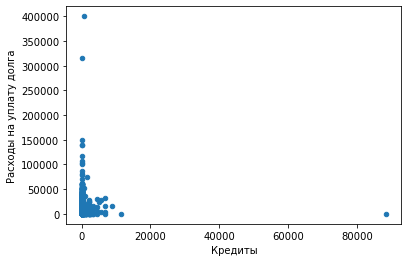

In [74]:
df_21_clean_num.plot('Кредиты', 'Расходы на уплату долга', kind='scatter')

In [75]:
  # В качестве проверки гипотез возьмем в пример состояние семей: влияет ли главенство в домохозяйстве на уровень бености семьи

In [76]:
df_21_f = df_21_clean[(df_21_clean['Глава семьи_код'] == 1) 
        |(df_21_clean['Глава семьи_код'] == 2)]

In [77]:
ct_o = df_21_f.groupby('Глава семьи_код')['Ниже предела бедности по России'].value_counts().unstack()

In [42]:
# под кодом 1 закодированы трудоспособные мужчины, под кодом 2 закодированы трудоспособные женщины во главе домохозяйств

In [78]:
ct_o

Ниже предела бедности по России,0.000,1.000
Глава семьи_код,,
1.000,1586,20
2.000,291,3


In [79]:
scipy.stats.chi2_contingency(ct_o, correction=False)

(0.1051278189737403,
 0.7457607286360446,
 1,
 array([[1586.55894737,   19.44105263],
        [ 290.44105263,    3.55894737]]))

In [80]:
# Рассмотрим следующие гипотезы в таком случае, что средние расходы семей у мужчин и женщин равны, альтернативная гипотеза, что не равны
# Для этого следует рассмотреть двусторонний тест

In [81]:
# Проверим данные на нормальность распределения через деление

In [82]:
m_family = df_21_clean[df_21_clean['Глава семьи_код'] == 1]['Расходы на уплату долга']
f_family = df_21_clean[df_21_clean['Глава семьи_код'] == 2]['Расходы на уплату долга']

<AxesSubplot:>

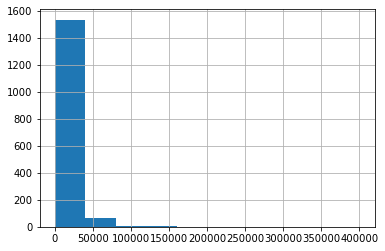

In [83]:
m_family.hist()

<AxesSubplot:>

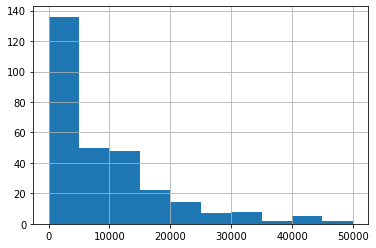

In [85]:
f_family.hist()

In [ ]:
# Даде после чистки данных, они не являются примером нормального распределения, что затрудняет дальнейший анализ